In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataframe and remove "Unnamed" column
cs_df = pd.read_csv('Data copy/Data_Marketing_Customer_Analysis_Round2.csv')
cs_df.drop(cs_df.filter(regex="Unname"),axis=1, inplace=True)

Activity 3

- Which columns are numerical?
- Which columns are categorical?
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.


In [3]:
#which columns are numerical?
numCols = cs_df.select_dtypes("number").columns
numCols = list(numCols)
numCols

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [4]:
#which columns are categorical?
catCols = cs_df.select_dtypes("object").columns
catCols= list(catCols)
catCols

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [5]:
#create new "Month" column (from "Effective To Date")
def return_month(value):
    return int(value[0])
cs_df['Month']=list(map(return_month, cs_df['Effective To Date']))
cs_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [6]:
#create new dataframe containing Q1
cs_q1_df = cs_df.loc[(cs_df['Month']<4)]
cs_q1_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [7]:
#function to rename "January" and "February"
def name_months(value):
    if value == 1:
        return 'January'
    elif value == 2:
        return 'February'
    
cs_q1_df['Month'] = list(map(name_months, cs_q1_df['Month']))
cs_q1_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


In [8]:
cs_df['Month']

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: Month, Length: 10910, dtype: int64

Activity 4

- Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [9]:
#create dataframe for numerical values
numericals_df = cs_q1_df[numCols].copy()
numericals_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [10]:
#create dataframe for categorical values
categorical_df = cs_q1_df[catCols].copy()
categorical_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [11]:
#function to show numericals_df columns as distribution plots
def distrib_plots(numericals_df):
    plt.figure(figsize = (14,12))
    for i, col in enumerate(numericals_df.columns, 1):
        plt.subplot(3,3,i)
        sns.histplot(numericals_df[col])

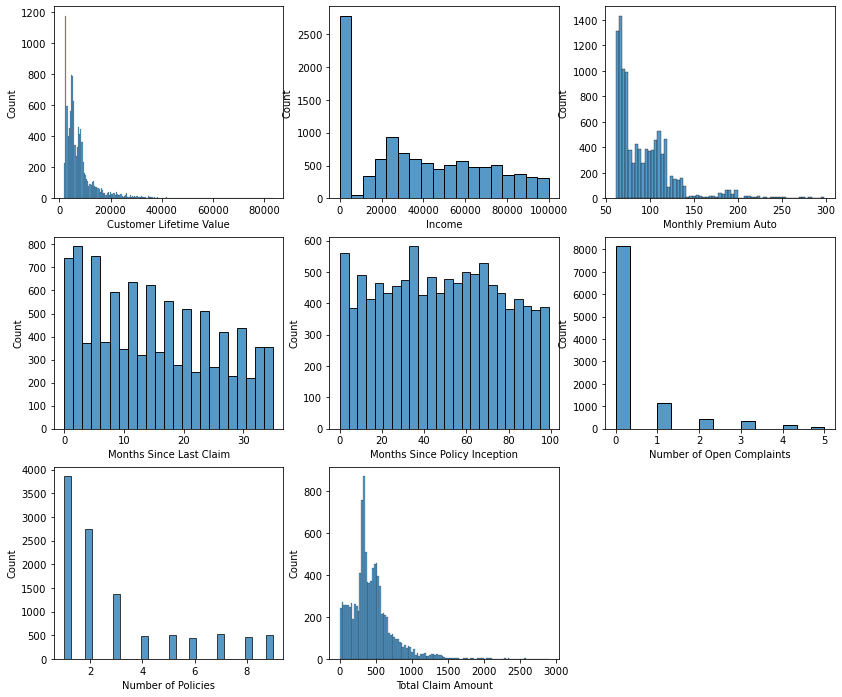

In [12]:
distrib_plots(numericals_df)

In [13]:
#function to show numericals_df as histograms 
def dist_plots(numericals_df):
    plt.figure(figsize = (14,12))
    for i, col in enumerate(numericals_df.columns, 1):
        plt.subplot(3,3,i)
        sns.distplot(numericals_df[col])

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

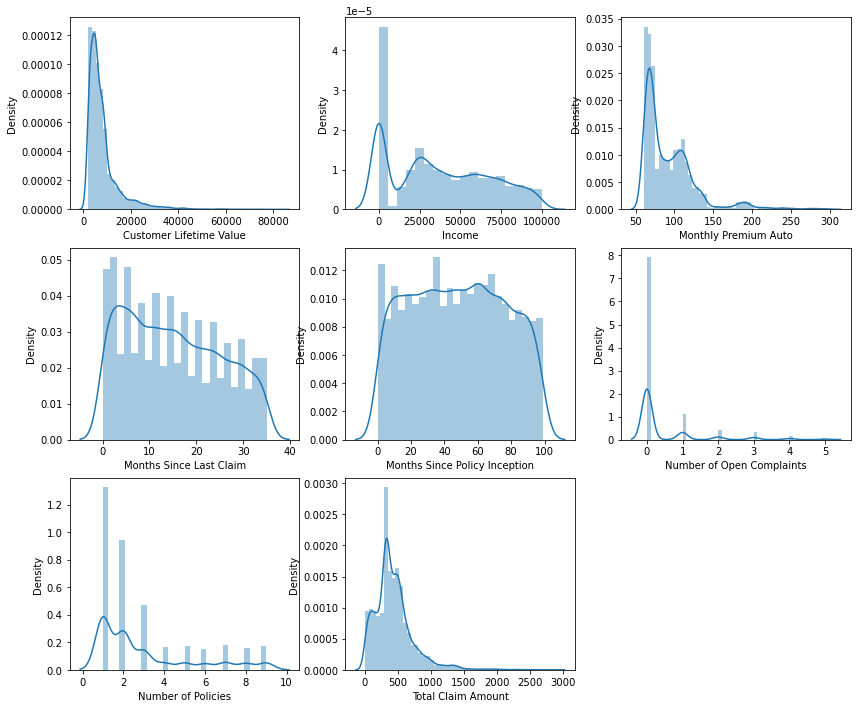

In [14]:
dist_plots(numericals_df)

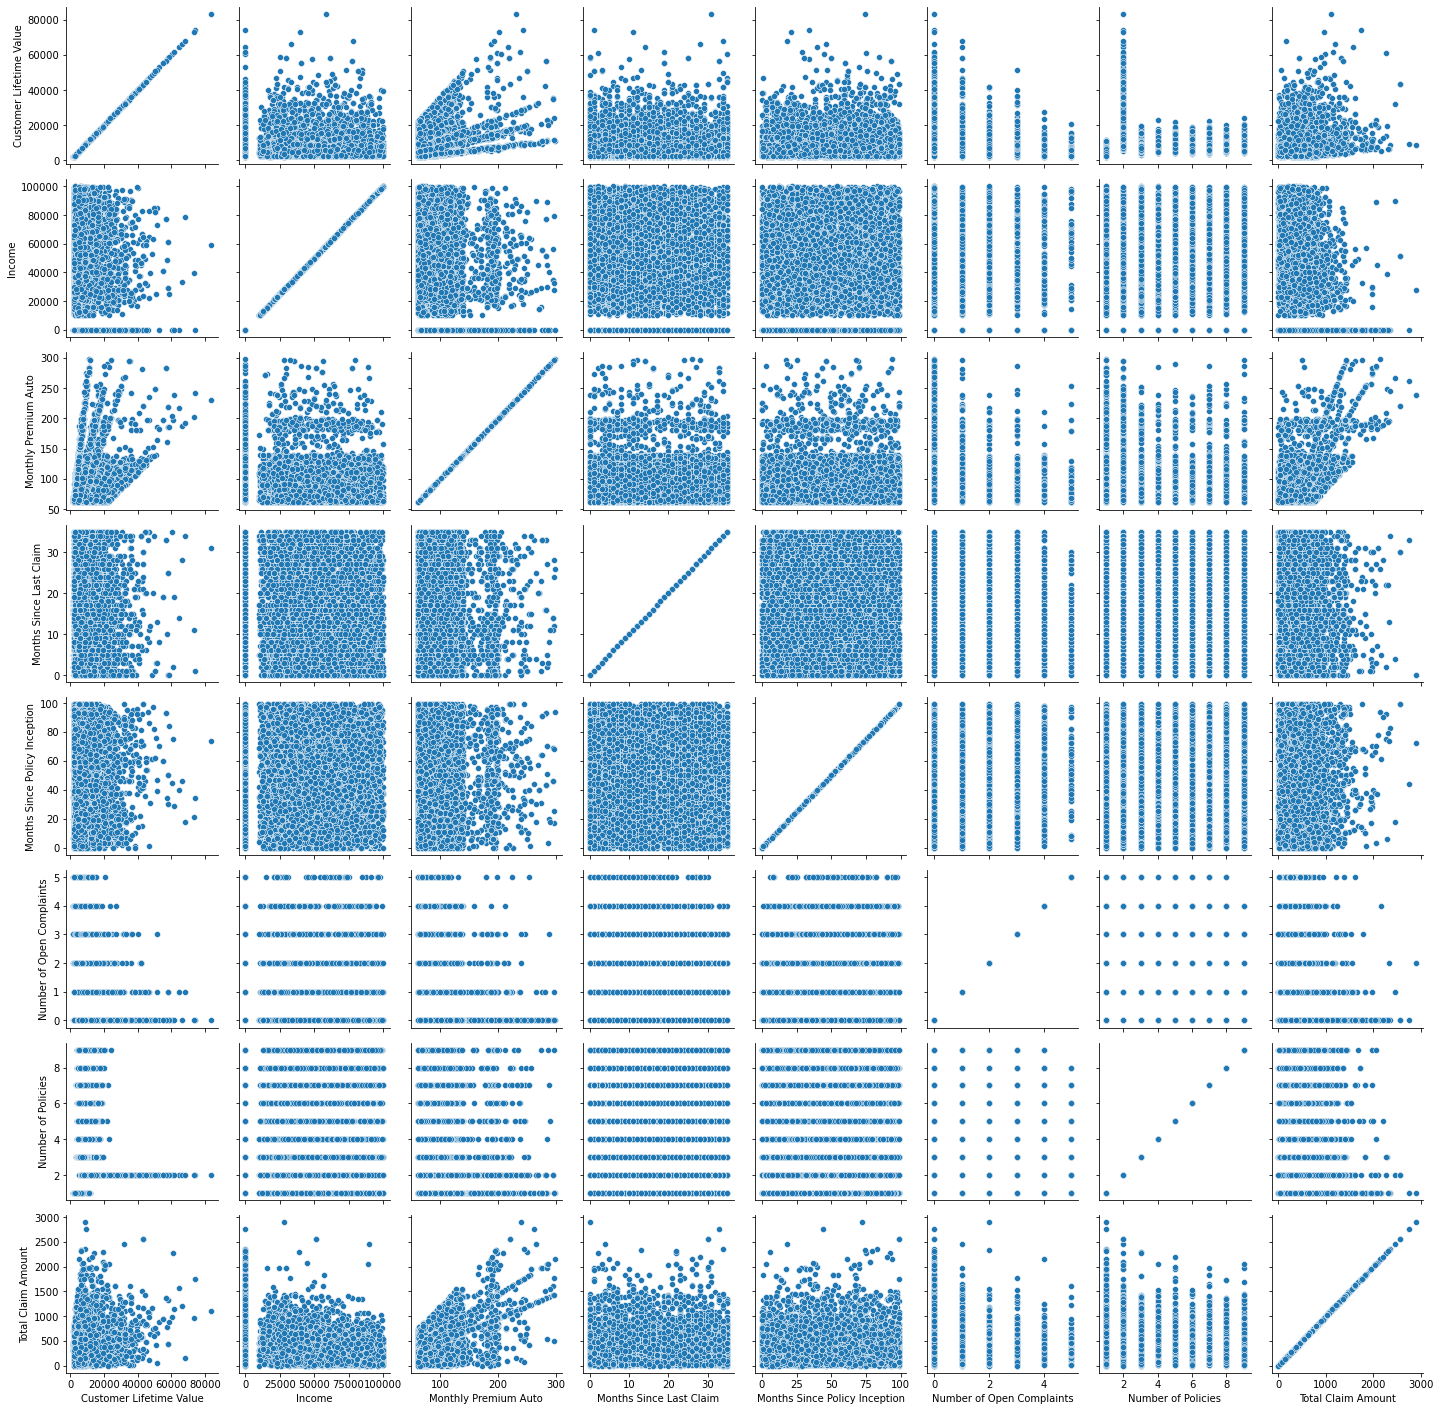

In [15]:
#show all values from numericals dataframe as scatterplots to check for correlation
g=sns.PairGrid(numericals_df)
g.map(sns.scatterplot)

Activity 5

- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

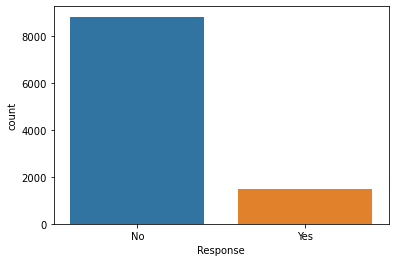

In [16]:
#plot "Response" column
sns.countplot(cs_q1_df['Response'])

<AxesSubplot:xlabel='Sales Channel', ylabel='count'>

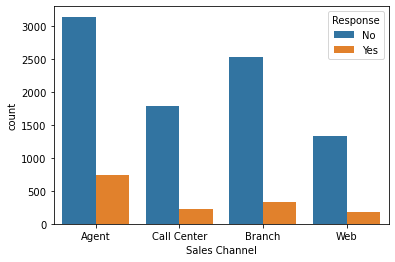

In [17]:
#plot "Sales Channel" and "Response"
sns.countplot(x = categorical_df["Sales Channel"],y = None, hue=categorical_df["Response"], palette=None)

(array([0, 1, 2]),
 [Text(0, 0, '(-2.794, 964.479]'),
  Text(1, 0, '(964.479, 1928.859]'),
  Text(2, 0, '(1928.859, 2893.24]')])

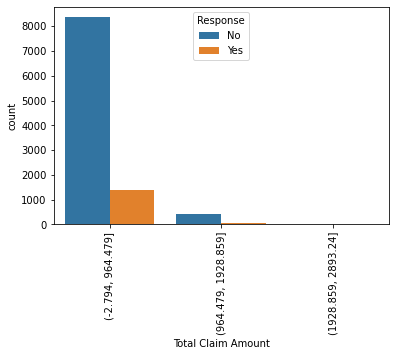

In [18]:
#plot "Total Claim Amount" and "Response"
sns.countplot(x = pd.cut(numericals_df['Total Claim Amount'], bins=3), y = None, hue=categorical_df['Response'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Income', ylabel='count'>

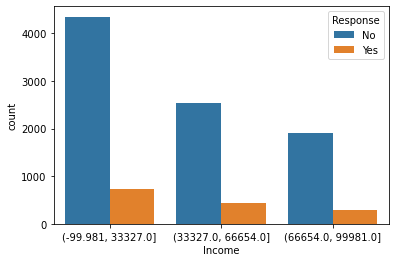

In [19]:
#plot "Income" and "Response"
sns.countplot(x=pd.cut(numericals_df["Income"], bins=3),y = None, hue=categorical_df["Response"], palette=None)

<AxesSubplot:xlabel='Income', ylabel='count'>

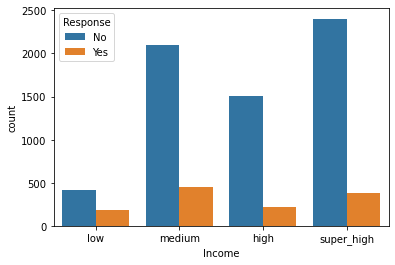

In [20]:
#create bins for "Income" and plot again with "Response"
sns.countplot(x = pd.cut(numericals_df["Income"],bins=[0,20000,40000,60000,100000],labels=["low","medium","high","super_high"]),y = None, hue=categorical_df["Response"], palette=None)

<AxesSubplot:xlabel='Total Claim Amount', ylabel='count'>

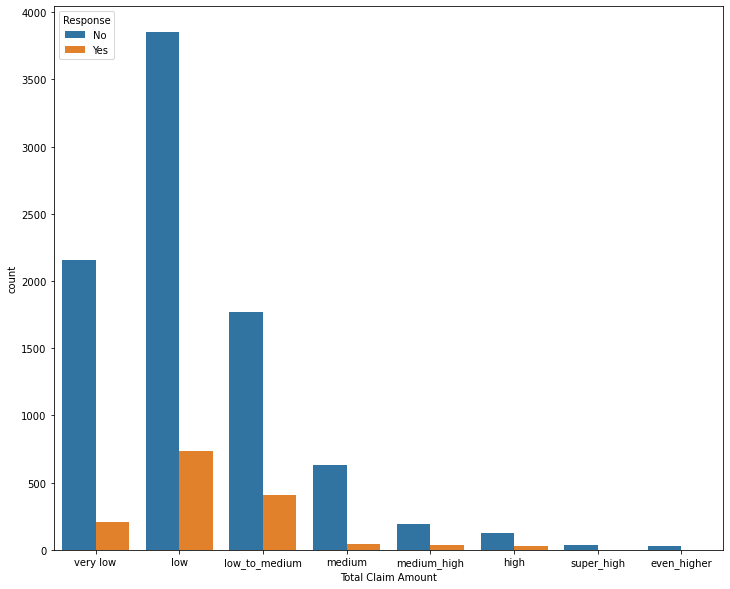

In [21]:
#plot "Total Claim Amount" with bins in intervalls of 250 and "Response"
plt.figure(figsize=(12,10))
sns.countplot(x = pd.cut(numericals_df["Total Claim Amount"],bins=[0,250,500,750,1000,1250,1500,1750,2000],labels=["very low","low","low_to_medium","medium","medium_high","high","super_high","even_higher"]),y = None, hue=categorical_df["Response"], palette=None)

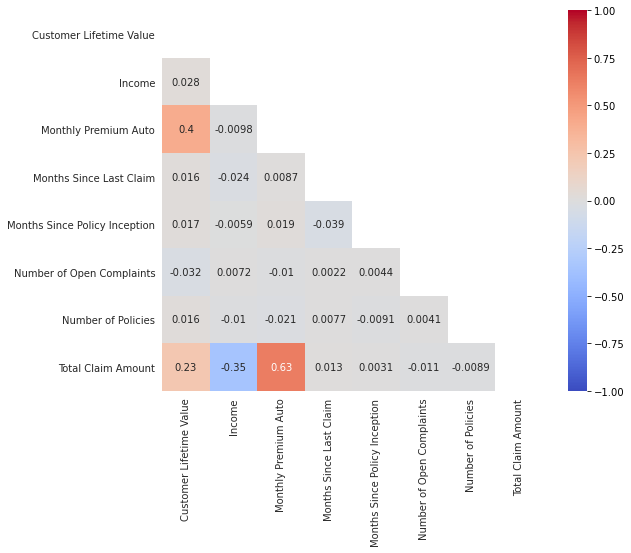

In [22]:
#plot heatmap from numericals_df 
corr = numericals_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)